In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [35]:
# Path to your Excel file
excel_path = "Customer_Churn_Data_Large.xlsx"

In [ ]:
# Read all sheets
all_sheets = pd.read_excel(excel_path, sheet_name=None)

# Drop the Transaction_History, Customer_Service sheet
sheets_to_keep = {name: df for name, df in all_sheets.items() 
                  if name not in ["Customer_Service", "Transaction_History"]}

# Reset index and drop any leftover index columns
dfs = [df.reset_index(drop=True) for df in sheets_to_keep.values()]

# Merge remaining sheets on 'CustomerID'
merged_df = reduce(lambda left, right: pd.merge(left, right, on="CustomerID", how="outer"), dfs)

# Save to CSV
merged_df.to_csv("churn_data.csv", index=False)
print("New dataset saved: churn_data.csv", merged_df.shape)

New dataset saved: churn_data.csv (1000, 9)


In [37]:
df=pd.read_csv('churn_data.csv')

In [38]:
df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,2023-12-05,5,Website,1
2,3,18,M,Single,Low,2023-11-15,3,Website,0
3,4,21,M,Widowed,Low,2023-08-25,2,Website,0
4,5,21,M,Divorced,Medium,2023-10-27,41,Website,0


In [39]:
df.shape

(1000, 9)

In [40]:
df.isnull().sum()

CustomerID        0
Age               0
Gender            0
MaritalStatus     0
IncomeLevel       0
LastLoginDate     0
LoginFrequency    0
ServiceUsage      0
ChurnStatus       0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      1000 non-null   int64 
 1   Age             1000 non-null   int64 
 2   Gender          1000 non-null   object
 3   MaritalStatus   1000 non-null   object
 4   IncomeLevel     1000 non-null   object
 5   LastLoginDate   1000 non-null   object
 6   LoginFrequency  1000 non-null   int64 
 7   ServiceUsage    1000 non-null   object
 8   ChurnStatus     1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


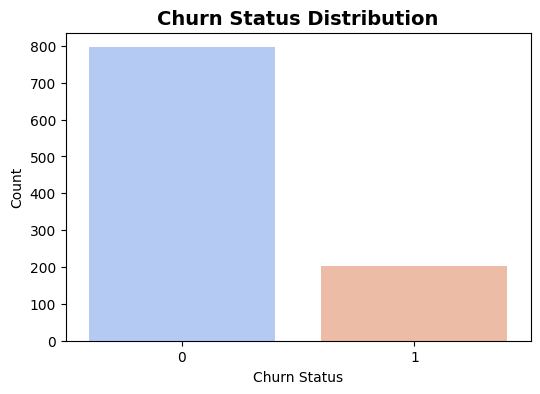

In [ ]:
# Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='ChurnStatus', hue='ChurnStatus', data=df, palette="coolwarm", legend=False)
plt.title("Churn Status Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Churn Status")
plt.ylabel("Count")
plt.show()

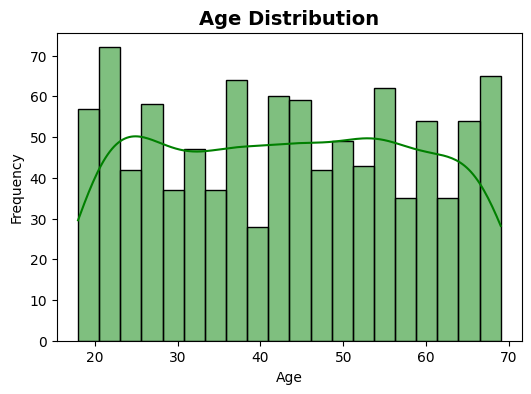

In [56]:
#Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True, color='green')
plt.title("Age Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


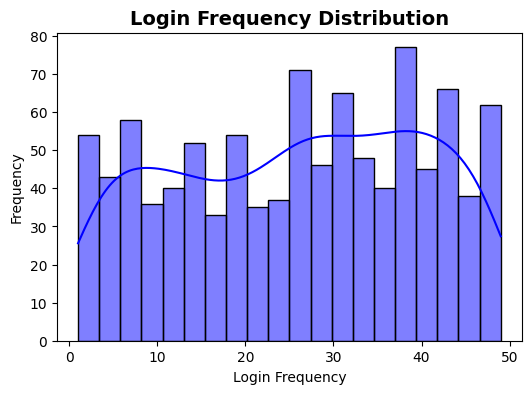

In [55]:
plt.figure(figsize=(6,4))
sns.histplot(df['LoginFrequency'], bins=20, kde=True, color='blue')
plt.title("Login Frequency Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Login Frequency")
plt.ylabel("Frequency")
plt.show()


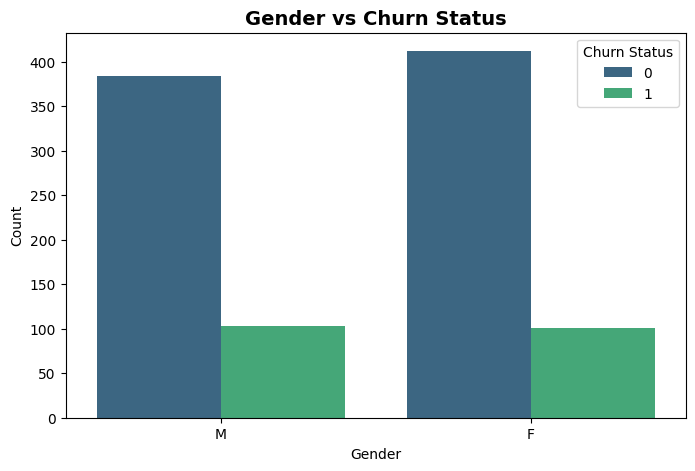

In [57]:
# gender vs churn
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='ChurnStatus', data=df, palette="viridis")
plt.title("Gender vs Churn Status", fontsize=14, fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn Status")
plt.show()


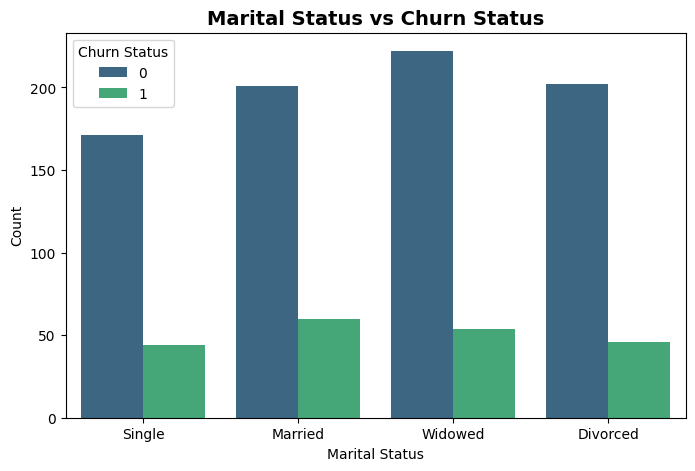

In [58]:
# Marital Status vs Churn Status
plt.figure(figsize=(8,5))
sns.countplot(x='MaritalStatus', hue='ChurnStatus', data=df, palette="viridis")
plt.title("Marital Status vs Churn Status", fontsize=14, fontweight='bold')
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title="Churn Status")
plt.show()


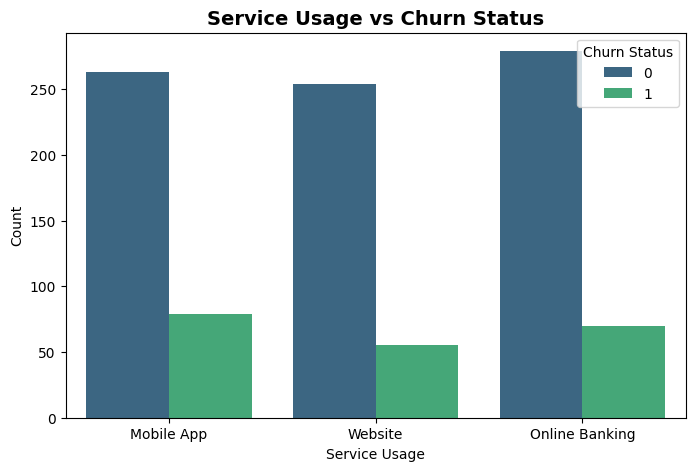

In [59]:
#Service usage vs churn
plt.figure(figsize=(8,5))
sns.countplot(x='ServiceUsage', hue='ChurnStatus', data=df, palette="viridis")
plt.title("Service Usage vs Churn Status", fontsize=14, fontweight='bold')
plt.xlabel("Service Usage")
plt.ylabel("Count")
plt.legend(title="Churn Status")
plt.show()


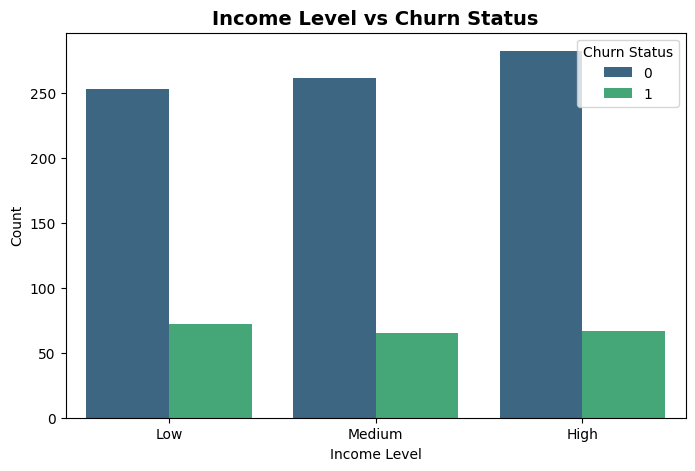

In [ ]:
# Income vs churn
plt.figure(figsize=(8,5))
sns.countplot(x='IncomeLevel', hue='ChurnStatus', data=df, palette="viridis")
plt.title("Income Level vs Churn Status", fontsize=14, fontweight='bold')
plt.xlabel("Income Level")
plt.ylabel("Count")
plt.legend(title="Churn Status")
plt.show()

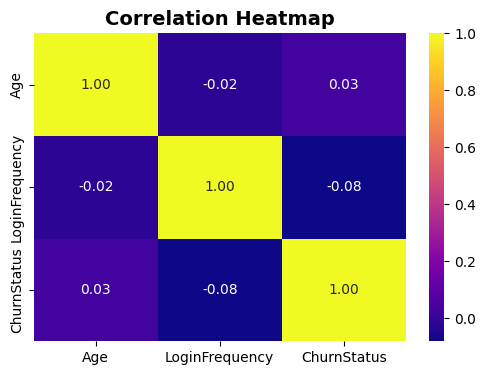

In [ ]:
#Heatmap
plt.figure(figsize=(6,4))
numeric_cols = ['Age', 'LoginFrequency', 'ChurnStatus']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="plasma", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap", fontsize=14, fontweight='bold')
plt.show()
